<a href="https://colab.research.google.com/github/ananttater/Machine-Learning/blob/main/03.%20Multiple_Linear_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## House Price Prediction using Multiple Linear Regression

Dataset Link: https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [3]:
test_data = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [4]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [5]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [6]:
data = pd.read_csv("housing_california.csv")

In [7]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [9]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [10]:
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [12]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [14]:
train_data = x_train.join(y_train)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11320,-117.97,33.76,18,1862,399.0,1301,369,3.1771,<1H OCEAN,194000
11947,-117.44,33.93,34,1577,272.0,880,284,4.6327,INLAND,116000
1561,-121.96,37.76,8,3865,463.0,1548,432,9.7037,<1H OCEAN,425100
8425,-118.34,33.92,29,1475,349.0,965,370,3.3558,<1H OCEAN,199600
14881,-117.06,32.63,37,1326,234.0,612,240,4.1250,NEAR OCEAN,160200
...,...,...,...,...,...,...,...,...,...,...
15371,-117.23,33.38,18,3339,704.0,1727,652,2.8393,<1H OCEAN,173200
11733,-120.83,39.02,15,1117,242.0,551,229,2.6319,INLAND,97700
3915,-118.52,34.19,37,1560,275.0,763,284,3.8516,<1H OCEAN,206900
15914,-122.41,37.74,52,2058,399.0,1208,399,3.6429,NEAR BAY,230000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

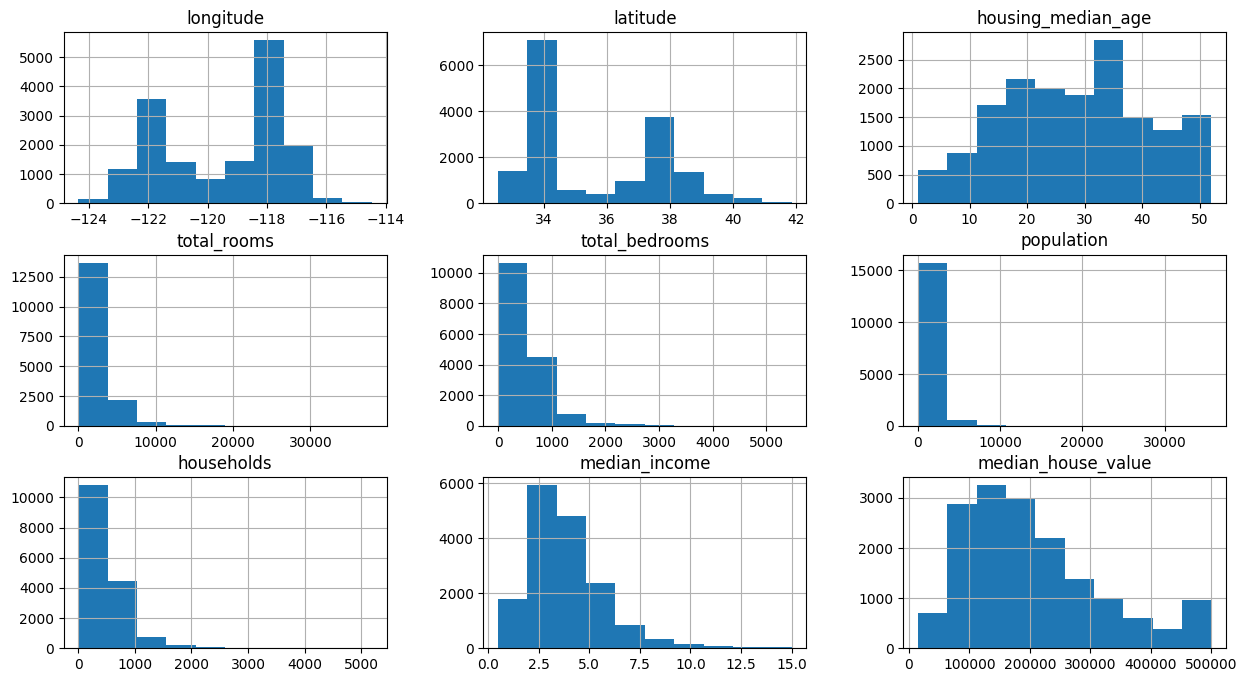

In [16]:
train_data.hist(figsize=(15, 8))

In [17]:
train_data.corr()

<ipython-input-17-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925311,-0.105380,0.043373,0.067851,0.102375,0.054870,-0.019396,-0.050553
latitude,-0.925311,1.000000,0.010105,-0.034890,-0.065751,-0.110042,-0.070332,-0.075166,-0.140066
housing_median_age,-0.105380,0.010105,1.000000,-0.363636,-0.320940,-0.298454,-0.303782,-0.125438,0.100595
total_rooms,0.043373,-0.034890,-0.363636,1.000000,0.927653,0.854257,0.917624,0.204749,0.138768
total_bedrooms,0.067851,-0.065751,-0.320940,0.927653,1.000000,0.875376,0.980238,-0.005748,0.053474
population,0.102375,-0.110042,-0.298454,0.854257,0.875376,1.000000,0.905071,0.007322,-0.025244
households,0.054870,-0.070332,-0.303782,0.917624,0.980238,0.905071,1.000000,0.015652,0.068713
median_income,-0.019396,-0.075166,-0.125438,0.204749,-0.005748,0.007322,0.015652,1.000000,0.686928
median_house_value,-0.050553,-0.140066,0.100595,0.138768,0.053474,-0.025244,0.068713,0.686928,1.000000


<ipython-input-18-9ab4983852c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

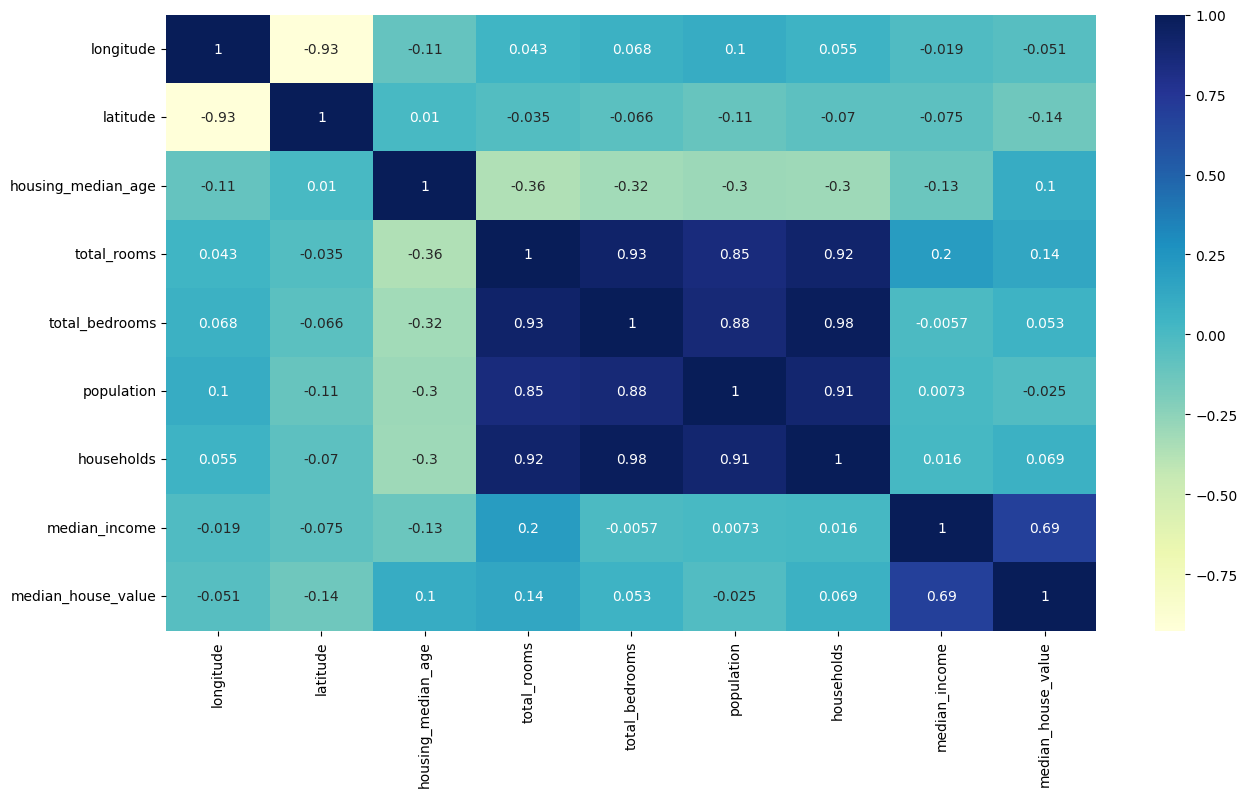

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [19]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7223
INLAND        5202
NEAR OCEAN    2111
NEAR BAY      1806
ISLAND           4
Name: ocean_proximity, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

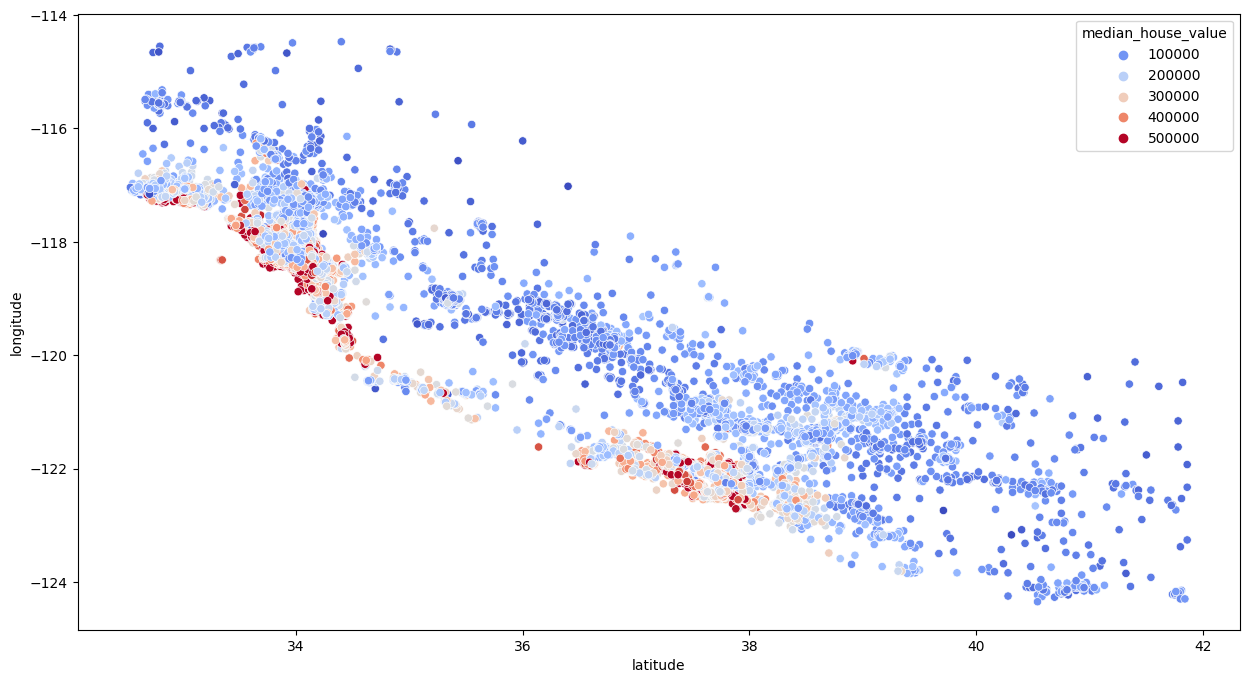

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

Looks a lot like california state map..


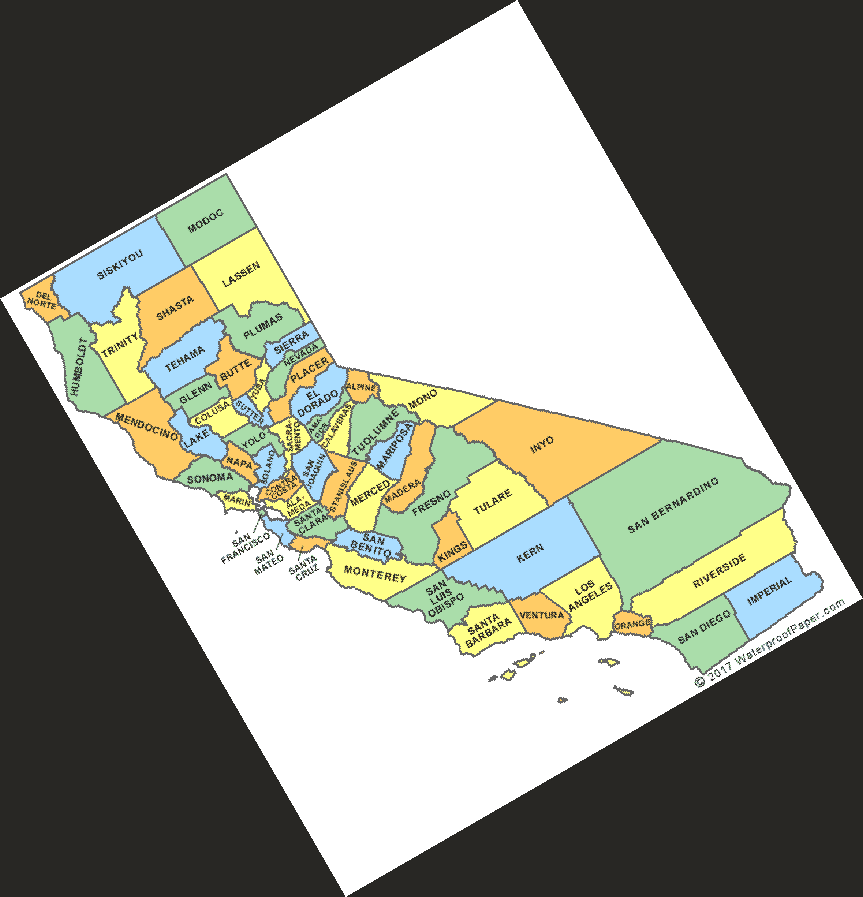

In [57]:
import urllib.request
from PIL import Image
urllib.request.urlretrieve('https://www.waterproofpaper.com/printable-maps/county-map/california-county-map.gif', "california_state.gif")
img = Image.open("california_state.gif")
img.rotate(30, expand=-10)

In [22]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11320,1,0,0,0,0
11947,0,1,0,0,0
1561,1,0,0,0,0
8425,1,0,0,0,0
14881,0,0,0,0,1
...,...,...,...,...,...
15371,1,0,0,0,0
11733,0,1,0,0,0
3915,1,0,0,0,0
15914,0,0,0,1,0


In [23]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

In [24]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11320,-117.97,33.76,18,1862,399.0,1301,369,3.1771,194000,1,0,0,0,0
11947,-117.44,33.93,34,1577,272.0,880,284,4.6327,116000,0,1,0,0,0
1561,-121.96,37.76,8,3865,463.0,1548,432,9.7037,425100,1,0,0,0,0
8425,-118.34,33.92,29,1475,349.0,965,370,3.3558,199600,1,0,0,0,0
14881,-117.06,32.63,37,1326,234.0,612,240,4.1250,160200,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15371,-117.23,33.38,18,3339,704.0,1727,652,2.8393,173200,1,0,0,0,0
11733,-120.83,39.02,15,1117,242.0,551,229,2.6319,97700,0,1,0,0,0
3915,-118.52,34.19,37,1560,275.0,763,284,3.8516,206900,1,0,0,0,0
15914,-122.41,37.74,52,2058,399.0,1208,399,3.6429,230000,0,0,0,1,0


<Axes: >

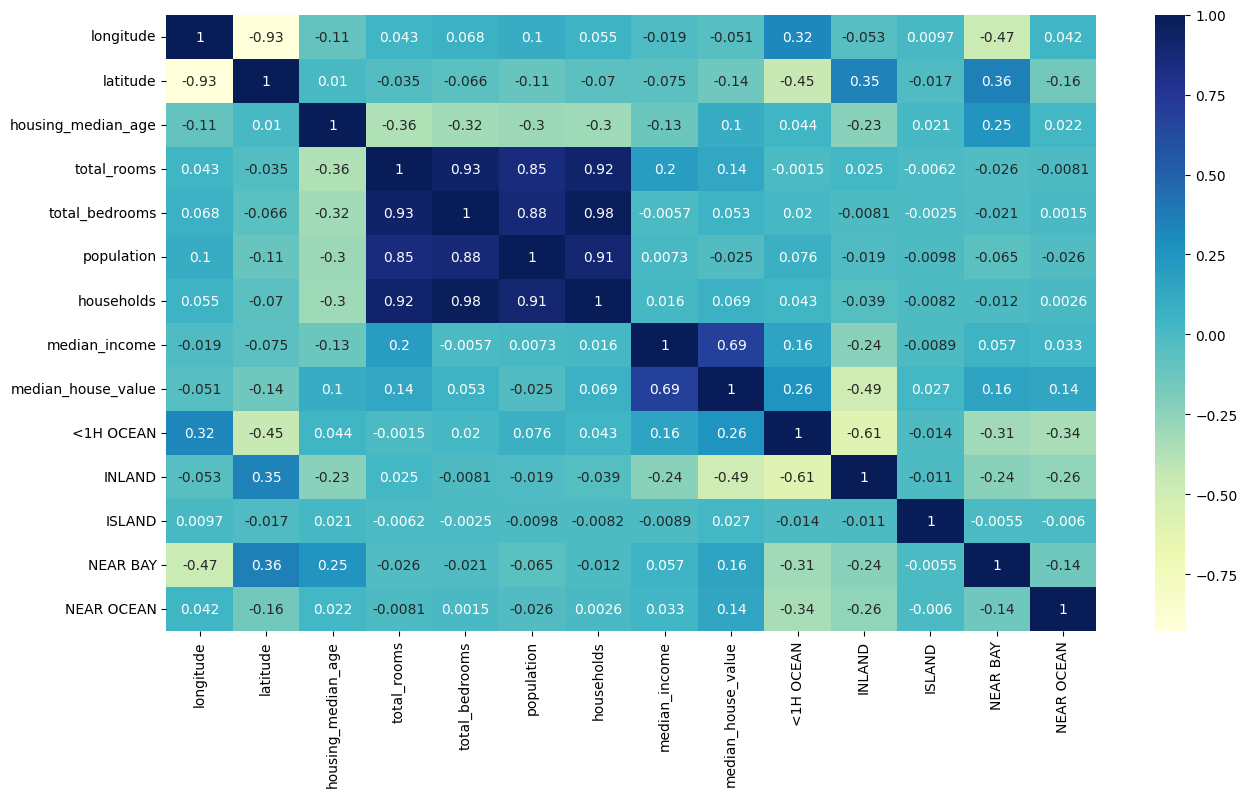

In [26]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [30]:
from sklearn.linear_model import LinearRegression
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [31]:
test_data = x_test.join(y_test)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

In [32]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4117,-118.22,34.14,52,2298,406.0,1203,387,5.5291,274600,1,0,0,0,0
7076,-117.99,33.93,33,2299,431.0,1049,447,3.6458,208100,1,0,0,0,0
8107,-118.21,33.80,44,1387,280.0,984,302,4.2500,143100,0,0,0,0,1
3439,-118.41,34.27,38,858,203.0,1250,204,2.9219,137900,1,0,0,0,0
6435,-118.01,34.11,43,1858,345.0,1054,329,3.5625,211600,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19934,-119.34,36.31,14,1635,422.0,870,399,2.7000,88900,0,1,0,0,0
9700,-121.62,36.67,31,2697,690.0,2220,665,2.5329,135200,1,0,0,0,0
20576,-122.00,38.83,26,272,49.0,194,52,3.4187,98400,0,1,0,0,0
2792,-118.39,37.36,38,1813,410.0,902,396,2.3261,98400,0,1,0,0,0


In [33]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11320,-117.97,33.76,18,1862,399.0,1301,369,3.1771,194000,1,0,0,0,0
11947,-117.44,33.93,34,1577,272.0,880,284,4.6327,116000,0,1,0,0,0
1561,-121.96,37.76,8,3865,463.0,1548,432,9.7037,425100,1,0,0,0,0
8425,-118.34,33.92,29,1475,349.0,965,370,3.3558,199600,1,0,0,0,0
14881,-117.06,32.63,37,1326,234.0,612,240,4.1250,160200,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15371,-117.23,33.38,18,3339,704.0,1727,652,2.8393,173200,1,0,0,0,0
11733,-120.83,39.02,15,1117,242.0,551,229,2.6319,97700,0,1,0,0,0
3915,-118.52,34.19,37,1560,275.0,763,284,3.8516,206900,1,0,0,0,0
15914,-122.41,37.74,52,2058,399.0,1208,399,3.6429,230000,0,0,0,1,0


In [34]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [35]:
reg.score(x_test, y_test)

0.6394218571576225

### Not the best accuracy that I am looking for..